In [1]:
%matplotlib widget
import sympy as sp
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
# import ipyvolume as ipv
import ipywidgets as ipw
sp.init_printing()

In [2]:
# H = lambda x: sp.Piecewise( (0, x <=0 ), (1, True) )
# x = sp.symbols('x')
# sign = lambda x: sp.Piecewise( (-1, x <= 0 ), (1, True) )
# sign(-2)

In [3]:
sign = lambda x: 2*sp.Heaviside(x) - 1

In [4]:
sign(1)

## Tangential direction

In [5]:
sigma_t_n1 = sp.symbols('\sigma_{\mathrm{T}_{n+1}}')
sigma_t_n1_trial = sp.symbols('\overline{\sigma}_{\mathrm{T}_{n+1}}')
omega_t_n1 = sp.symbols('\omega_{\mathrm{T}_{n+1}}')
epsilon_p_t_n1 = sp.symbols('\epsilon^p_{\mathrm{T}_{n+1}}')
epsilon_p_t_n = sp.symbols('\epsilon^p_{\mathrm{T}_{n}}')
epsilon_t_n1 = sp.symbols('\epsilon_{\mathrm{T}_{n+1}}')
epsilon_t_n = sp.symbols('\epsilon_{\mathrm{T}_{n}}')
E_t = sp.symbols('E_{\mathrm{T}}', nonnegative=True)
gamma = sp.symbols('\gamma')
alpha_n = sp.symbols('alpha_n')
K = sp.symbols('K')
p = sp.symbols('p', nonnegative=True)
z_n = sp.symbols('z_n')

In [6]:
omega_t_n = sp.symbols('\omega_{\mathrm{T}_{n}}')
delta_lambda = sp.symbols('\Delta\lambda')
c = sp.symbols('c', nonnegative=True)
sigma_bar = sp.symbols('\overline{\sigma_{\mathrm{T}}}', nonnegative=True)
sigma_n_n = sp.symbols('\sigma_{\mathrm{N}_{n}}')
Y_t_n1 = sp.symbols('Y_{\mathrm{T}_{n+1}}')
S = sp.symbols('S', nonnegative=True)
m = sp.symbols('m', nonnegative=True)
r = sp.symbols('r', nonnegative=True)

In [7]:
sigma_t_n1_trial_ = E_t * (epsilon_t_n1 - epsilon_p_t_n)
sigma_t_n1_trial_

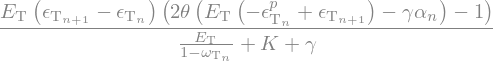

In [8]:
# delta_lambda_ = (abs(E_t * (epsilon_t_n1 - epsilon_p_t_n) - gamma * alpha_n ) - K * z_n - sigma_bar + m * sigma_n_n ) / \
# (E_t / (1 - omega_t_n) + gamma + K)
# delta_lambda_ 

# delta_lambda_ = (E_t * (epsilon_t_n1 - epsilon_t_n) * (sigma_t_n1_trial_ - gamma * alpha_n)/
#                  sp.Abs(sigma_t_n1_trial_ - gamma * alpha_n)) / (E_t / (1 - omega_t_n) + gamma + K)

delta_lambda_ = (E_t * (epsilon_t_n1 - epsilon_t_n) * sign(sigma_t_n1_trial_ - gamma * alpha_n) /
                 (E_t / (1 - omega_t_n) + gamma + K))
# delta_lambda_ = sp.simplify(delta_lambda_)
delta_lambda_ 

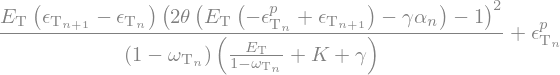

In [9]:
epsilon_p_t_n1_ = epsilon_p_t_n + (delta_lambda_ / (1 - omega_t_n)) * sign(sigma_t_n1_trial_ - gamma * alpha_n)
# epsilon_p_t_n1_ = sp.simplify(epsilon_p_t_n1_)
epsilon_p_t_n1_

In [10]:
Y_t_n1_ = sp.Rational(1,2) * E_t * (epsilon_t_n1 - epsilon_p_t_n)**2
# sp.simplify(Y_t_n1_)

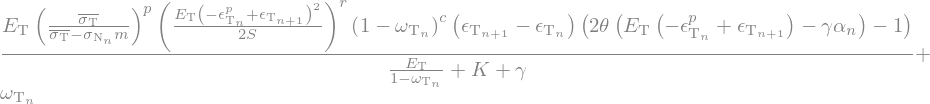

In [11]:
omega_t_n1_ = omega_t_n + delta_lambda_ * (1 - omega_t_n) ** c * (sigma_bar/(sigma_bar - m*sigma_n_n))**p * (Y_t_n1_/S)**r
omega_t_n1_

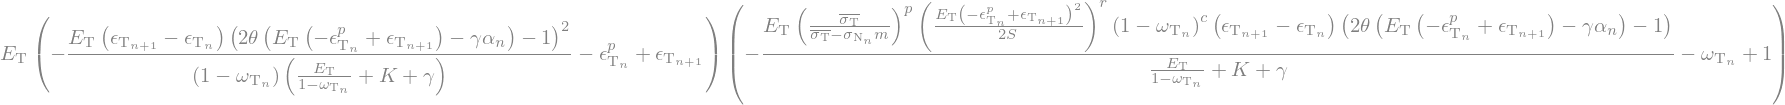

In [12]:
sigma_t_n1_ = (1 - omega_t_n1_) * E_t * (epsilon_t_n1 - epsilon_p_t_n1_)
sigma_t_n1_

In [13]:
c_T = sigma_t_n1_.diff(epsilon_t_n1)

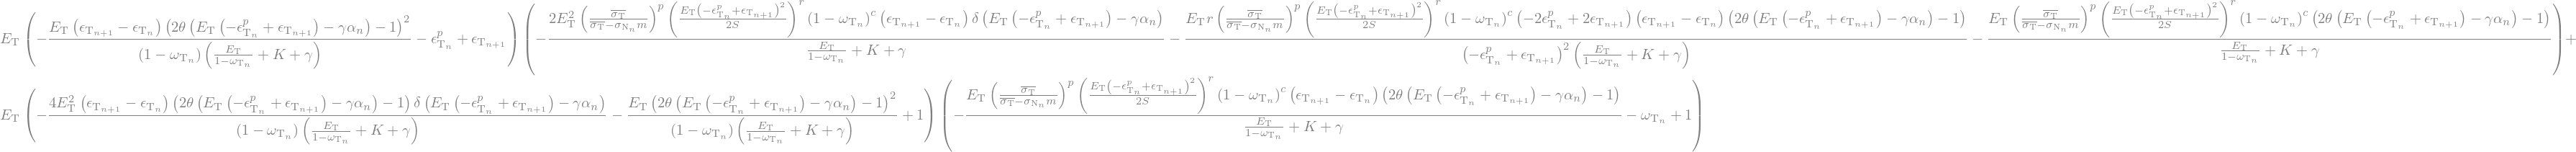

In [14]:
c_T

## Normal direction

In [20]:
sigma_N_n1 = sp.symbols('\sigma_{\mathrm{N}_{n+1}}')
sigma_N_n1_trial = sp.symbols('\overline{\sigma}_{\mathrm{N}_{n+1}}')
omega_N_n1 = sp.symbols('\omega_{\mathrm{N}_{n+1}}')
omega_N_n = sp.symbols('\omega_{\mathrm{N}_{n}}')
epsilon_p_N_n1 = sp.symbols('\epsilon^p_{\mathrm{N}_{n+1}}')
epsilon_p_N_n = sp.symbols('\epsilon^p_{\mathrm{N}_{n}}')
epsilon_N_n1 = sp.symbols('\epsilon_{\mathrm{N}_{n+1}}')
epsilon_N_n = sp.symbols('\epsilon_{\mathrm{N}_{n}}')
E_N = sp.symbols('E_{\mathrm{N}}')
gamma_N = sp.symbols('\gamma_{\mathrm{N}}')
alpha_N_n = sp.symbols('alpha_{\mathrm{N}_{n}}')
r_N_n = sp.symbols('r_{\mathrm{N}_{n}}')
K_N = sp.symbols('K_{\mathrm{N}}')
X_N = sp.symbols('K_{\mathrm{N}}')
A_d = sp.symbols('A_{\mathrm{d}}')

In [21]:
sigma_trial_ = E_N * (epsilon_N_n1 - epsilon_p_N_n)

## Tension

In [22]:
delta_lambda_omena_N_ = E_N * (epsilon_N_n1 - epsilon_N_n) * epsilon_N_n * A_d * (1 + r_N_n)**2
delta_lambda_omena_N_

In [24]:
omega_N_n1_ = omega_N_n + delta_lambda_omena_N_
omega_N_n1_

In [25]:
sigma_tension_N = (1 - omega_N_n1_) * E_n * (epsilon_N_n1 - epsilon_p_N_n)

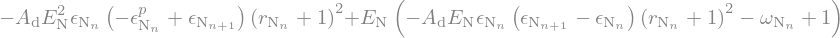

In [26]:
C_tension = sigma_tension_n.diff(epsilon_N_n1)
C_tension

## Compression

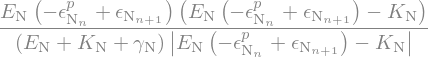

In [29]:
delta_lambda_plastic_N_ = (E_N * (epsilon_N_n1 - epsilon_p_N_n) * (sigma_trial_ - X_N)/abs(sigma_trial_ - X_N))/(E_N + K_N + gamma_N)
delta_lambda_plastic_N_

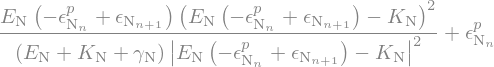

In [30]:
epsilon_p_N_n1_ = epsilon_p_N_n + delta_lambda_plastic_N_ * (sigma_trial_ - X_N)/abs(sigma_trial_ - X_N)
epsilon_p_N_n1_

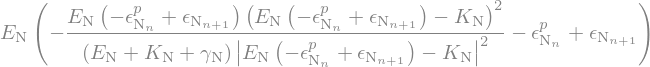

In [33]:
sigma_compression_N_ = E_N * (epsilon_n_n1 - epsilon_p_N_n1_)
sigma_compression_N_

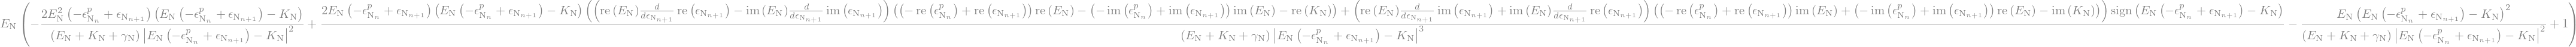

In [32]:
C_compression = sigma_compression_N_.diff(epsilon_n_n1)
C_compression